In [31]:
# Import the necessary modules and libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_california_housing
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from IPython.display import Image  
from sklearn.externals.six import StringIO  
import pydot
from matplotlib.colors import ListedColormap
from sklearn import tree

In [21]:
# Download the dataset.
housing = fetch_california_housing()

X = pd.DataFrame(housing.data, columns=housing.feature_names)
y = housing.target

y -= y.mean()

# Split the dataset.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
print(X.shape)

print(housing.feature_names)

(20640, 8)
['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


In [23]:
# Instantiate and train the regression trees.
tree_reg1 = DecisionTreeRegressor(random_state=42, max_depth=2)
tree_reg2 = DecisionTreeRegressor(random_state=42, max_depth=3)
tree_reg3 = DecisionTreeRegressor(random_state=42)

tree_reg1.fit(X_train, y_train)
tree_reg2.fit(X_train, y_train)
tree_reg3.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=42, splitter='best')

In [24]:
y1 = tree_reg1.predict(X_test)
y2 = tree_reg2.predict(X_test)
y3 = tree_reg3.predict(X_test)

mse1 = mean_squared_error(y_test,y1)
mse2 = mean_squared_error(y_test,y2)
mse3 = mean_squared_error(y_test,y3)

print('mse1: ',mse1)
print('mse2: ',mse2)
print('mse3: ',mse3)

mse1:  0.7542635096031609
mse2:  0.6424109810265639
mse3:  0.5093295655763095


# Using Grid Search to fine-tune 'max_depth' and 'min_samples_leaf' hyperparameters

In [25]:
# Set parameters for grid-search.
param_grid = [{'max_depth': [1, 2, 3, 4, 5, None], 'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}]

# Instantiate DT class.
reg = DecisionTreeRegressor(random_state=42)
grid_search = GridSearchCV(reg, param_grid, cv=5, verbose=3, n_jobs=-1)

# Find best hyperparameters.
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   16.8s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:   24.6s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=42, splitter='best'),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid=[{'max_depth': [1, 2, 3, 4, 5, None], 'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=3)

In [26]:
grid_search.best_params_

{'max_depth': None, 'min_samples_leaf': 10}

In [27]:
clf = DecisionTreeRegressor(random_state=42, max_depth=None, min_samples_leaf=10)

clf.fit(X_train, y_train)

y = clf.predict(X_test)

mse = mean_squared_error(y_test,y)

print('mse: ',mse)

mse:  0.36383118369718925


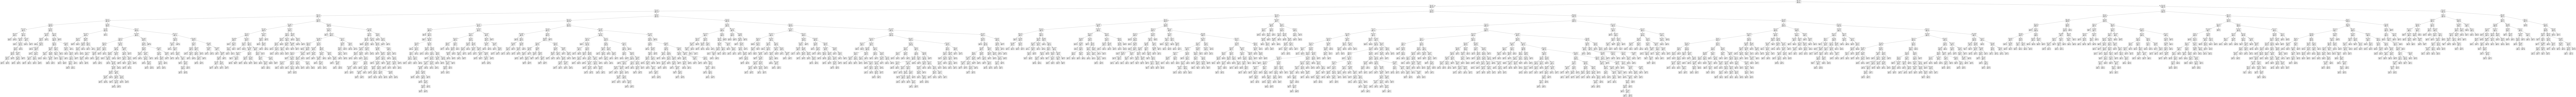

In [32]:
# visualize the decision tree.
# you've got to have graphviz and pydot installed on your computer.
# Execute: conda install graphviz pydot
dot_data = StringIO()  
tree.export_graphviz(clf, out_file=dot_data)
graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png())